In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

from IPython.display import display, clear_output
import time

In [2]:
df = pd.read_csv("tiny.csv", header=None)
df

,0,1
0,-1.085631,-0.678886
1,0.997345,-0.094709
2,0.282978,1.491390
3,-1.506295,-0.638902
4,-0.578600,-0.443982
5,1.651437,-0.434351
6,-2.426679,2.205930
7,-0.428913,2.186786
8,1.265936,1.004054
9,-0.866740,0.386186


In [3]:
cities = {i: (row[0], row[1]) for i, row in df.iterrows()}
num_cities = len(cities)

In [4]:
temp = 10000
cooling_rate = 0.001

In [5]:
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

In [6]:
def total_distance(route):
    return sum(distance(cities[route[i]], cities[route[i - 1]]) for i in range(num_cities))

In [7]:
def plot_route(route, title=""):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'ro-')
    plt.plot(x[0], y[0], 'bo') 
    plt.title(title + " Distance: " + str(total_distance(route)))
    plt.show()

In [8]:
def plot_live_distance_changes(distances):
    plt.figure(figsize=(10, 5))
    plt.plot(distances, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.title('Live Changes in Distance')
    plt.grid(True)
    plt.show()

In [9]:
initial_route = list(cities.keys())
random.shuffle(initial_route)

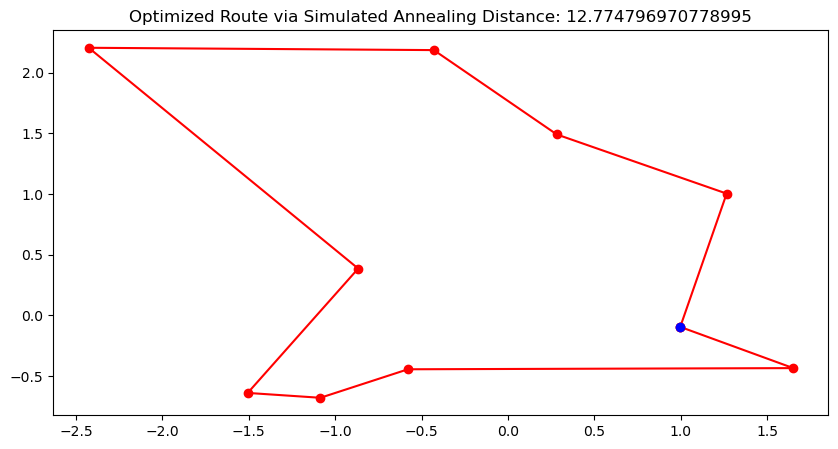

In [10]:
def simulated_annealing(route, temp, cooling_rate):
    
    current_route = route[:]
    best_route = route[:]
    best_distance = total_distance(route)
    distances = [best_distance]
    
    while temp > 1:
        
        #By randomly swapping the positions of two cities in the route,
        #the algorithm explores different potential routes and aims to find a shorter route than the current one.
        #This process is essential for the simulated annealing algorithm to explore the solution space effectively
        #and potentially converge to a near-optimal solution for the Traveling Salesperson Problem.
        
        new_route = current_route[:]
        swap_index1, swap_index2 = random.sample(range(num_cities), 2)
        new_route[swap_index1], new_route[swap_index2] = new_route[swap_index2], new_route[swap_index1]
        
        # Calculate the new distance
        current_distance = total_distance(current_route)
        new_distance = total_distance(new_route)
        
        # Decide whether to accept the new route
        if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temp):
            current_route = new_route[:]
            if new_distance < best_distance:
                best_distance = new_distance
                best_route = new_route[:]
                
#               distances.append(best_distance)
#               plot_live_distance_changes(distances)
#               time.sleep(0.01)
#               clear_output(wait=True)

                plot_route(best_route, "Optimized Route via Simulated Annealing")
                time.sleep(0.001)
                clear_output(wait=True)
            
        
        # Decrease the temperature
        temp *= (1 - cooling_rate)
    
    return best_route

final_route = simulated_annealing(initial_route, temp, cooling_rate)

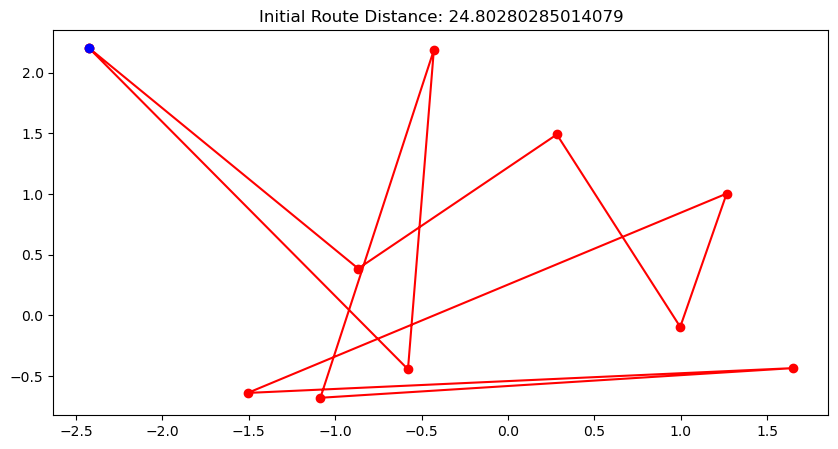

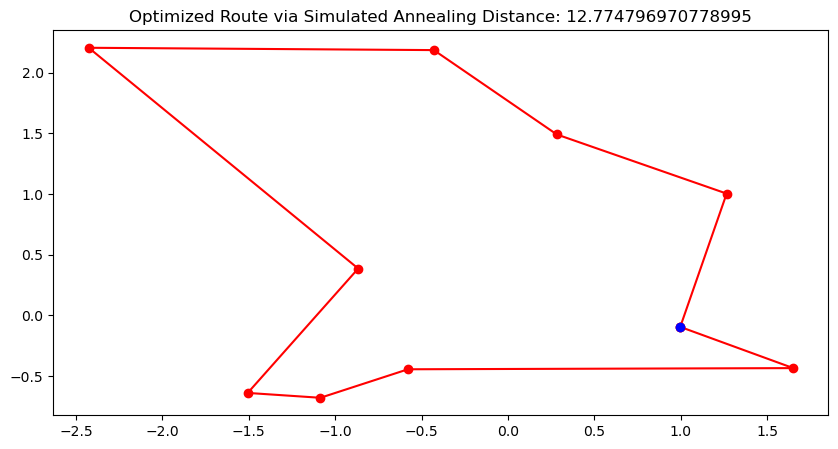

In [11]:
plot_route(initial_route, "Initial Route")
plot_route(final_route, "Optimized Route via Simulated Annealing")

In [12]:
def calculate_improvement(initial_distance, optimized_distance):
    improvement = (initial_distance - optimized_distance) / initial_distance * 100
    return improvement

improvement = calculate_improvement (total_distance(initial_route), total_distance(final_route))
print(f"Improvement: {improvement:.2f}%")

Improvement: 48.49%
